In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# 1. Download the latest version
path = kagglehub.dataset_download("fedesoriano/cirrhosis-prediction-dataset")

# 2. Load it directly into a dataframe
# Note: kagglehub returns the path to the folder containing the CSV
df = pd.read_csv(f"{path}/cirrhosis.csv")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [31]:
df.drop('ID', axis=1, inplace=True)

In [32]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [34]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [35]:
df[df["Drug"].isna()]


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
313,3561,D,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0
314,2844,C,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0
315,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [36]:
#Drop null values in column "Drug"
df.dropna(subset=["Drug"], inplace=True)
df.isna().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [ ]:
# 1. Select only numeric columns for imputation
# KNN cannot handle strings/objects.
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# 2. Scale the data
# This ensures features with large values don't dominate the distance calculation.
scaler = MinMaxScaler()
df_scaled1 = pd.DataFrame(scaler.fit_transform(df_numeric), 
                         columns=numeric_cols, 
                         index=df.index)

# 3. Apply KNN Imputation
imputer = KNNImputer(n_neighbors=6)
df_imputed_scaled = imputer.fit_transform(df_scaled1)

# 4. Inverse transform to return to original scale
df_imputed_numeric = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), 
                                  columns=numeric_cols, 
                                  index=df.index)

# 5. Merge back into the original dataframe
# This preserves any non-numeric columns you might have had.
df_final = df.copy()
df_final[numeric_cols] = df_imputed_numeric
df = df_final

# Verification
print("Missing values after imputation:")
print(df_final[['Cholesterol', 'Copper', 'Tryglicerides']].isna().sum())


Missing values after imputation:
Cholesterol      0
Copper           0
Tryglicerides    0
dtype: int64


In [54]:
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Feature engineering 

In [55]:
#Feature Selection for Clustering
# 1. Define the columns we want to use for clustering
features = ['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 
            'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 
            'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. Separate them from the outcome/target variables
df_features = df[features].copy()

# 3. Keep the targets in a separate place for later validation
df_outcomes = df[['Status', 'N_Days', 'Stage']].copy()

print("Feature Selection Complete. Current features shape:", df_features.shape)

Feature Selection Complete. Current features shape: (312, 15)


In [56]:
# Encoding
# 1. Map Binary Features (Sex and Yes/No columns)
binary_map = {'Y': 1, 'N': 0, 'F': 1, 'M': 0}

cols_to_map = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
for col in cols_to_map:
    df_features[col] = df_features[col].map(binary_map)

# 2. Map Ordinal Feature (Edema)
# N = no edema, S = edema without diuretics, Y = edema with diuretics
edema_map = {'N': 0, 'S': 1, 'Y': 2}
df_features['Edema'] = df_features['Edema'].map(edema_map)

# Quick Sanity Check
print(df_features[['Sex', 'Ascites', 'Edema']].head())



   Sex  Ascites  Edema
0    1        1      2
1    1        0      0
2    0        0      1
3    1        0      1
4    1        0      0


In [ ]:
#scaling 
# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit and transform the numerical features
# This turns Age, Bilirubin, etc., into values typically between -3 and 3
scaled_data = scaler.fit_transform(df_features)

# 3. Convert the result back to a DataFrame for readability
df_scaled = pd.DataFrame(scaled_data, columns=df_features.columns)

# Quick check: The mean should be nearly 0 and standard deviation should be 1
print(df_scaled.describe().round(2))

          Age     Sex  Ascites  Hepatomegaly  Spiders   Edema  Bilirubin  \
count  312.00  312.00   312.00        312.00   312.00  312.00     312.00   
mean    -0.00    0.00    -0.00          0.00     0.00   -0.00      -0.00   
std      1.00    1.00     1.00          1.00     1.00    1.00       1.00   
min     -2.25   -2.77    -0.29         -1.03    -0.64   -0.40      -0.65   
25%     -0.74    0.36    -0.29         -1.03    -0.64   -0.40      -0.54   
50%     -0.02    0.36    -0.29          0.97    -0.64   -0.40      -0.42   
75%      0.63    0.36    -0.29          0.97     1.57   -0.40       0.04   
max      2.69    0.36     3.46          0.97     1.57    3.25       5.47   

       Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
count       312.00   312.00  312.00    312.00  312.00         312.00   
mean          0.00     0.00   -0.00      0.00   -0.00           0.00   
std           1.00     1.00    1.00      1.00    1.00           1.00   
min          -1.10    -3.72

## Clustering

In [ ]:
#PCA 
# 1. Initialize PCA
# We can tell it to keep 95% of the information (variance)
pca = PCA(n_components=0.95)

# 2. Fit and transform the scaled data
pca_data = pca.fit_transform(df_scaled)

# 3. See how many dimensions we have now
print(f"Original features: {df_scaled.shape[1]}")
print(f"Reduced features: {pca_data.shape[1]}")

Original features: 15
Reduced features: 13


In [66]:
pca_data

array([[ 5.65673373, -2.09100907,  0.97241143, ...,  0.20866698,
         0.22423765, -0.19132936],
       [-0.27759203,  0.14660002,  0.19410542, ...,  0.89479557,
         1.8965307 ,  0.33743963],
       [ 0.60346451, -2.997732  , -2.60851076, ...,  0.3429774 ,
        -0.28866898,  0.11621179],
       ...,
       [-0.73475436, -0.19523848, -0.0500858 , ...,  0.35556   ,
         0.22858015, -0.12660362],
       [-1.20897935,  0.14059453,  0.65878851, ..., -0.4055825 ,
        -1.19109196, -0.34886104],
       [ 0.5140342 ,  1.57526755,  1.04753113, ...,  0.90208579,
        -0.48151321,  0.85223856]], shape=(312, 13))

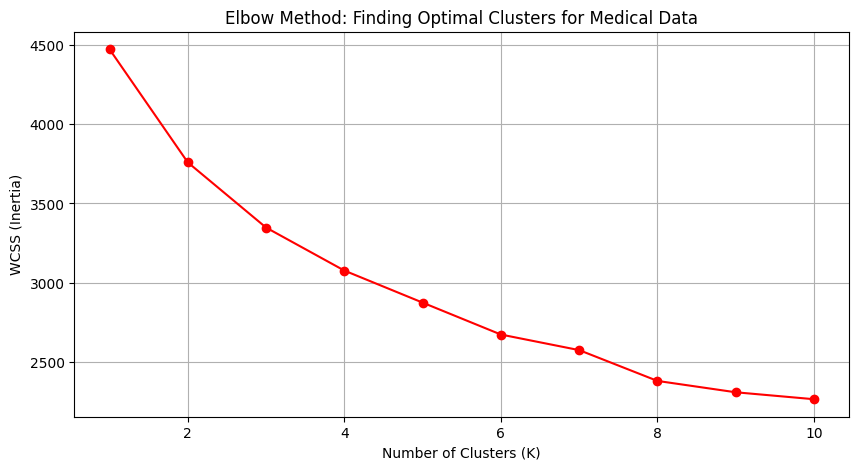

In [ ]:
#WCSS plot
# 1. Use your actual PCA data (already scaled and encoded)
X = pca_data 

# 2. Calculate WCSS for your 312 patients
wcss = []
for i in range(1, 11):
    # k-means++ ensures we don't get stuck in a bad starting position
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 3. Plot your actual Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method: Finding Optimal Clusters for Medical Data')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
# Using Silhouette Score to validate our choice of K
for k in range(2, 6):
    km = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    labels = km.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    print(f"For K={k}, Silhouette Score is: {score:.4f}")

For K=2, Silhouette Score is: 0.2792
For K=3, Silhouette Score is: 0.1821
For K=4, Silhouette Score is: 0.1448
For K=5, Silhouette Score is: 0.1460


In [ ]:

# 1. Initialize and fit the final model
kmeans_final = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)
cluster_labels = kmeans_final.fit_predict(pca_data)

# 2. Add the labels back to your original dataframe
# This is crucial so we can see real lab values like Bilirubin next to the cluster
df['Cluster'] = cluster_labels

In [70]:
# Compare the means of key columns across clusters
analysis = df.groupby('Cluster')[['Stage', 'Bilirubin', 'Prothrombin', 'Age']].mean()
print(analysis)

            Stage  Bilirubin  Prothrombin           Age
Cluster                                                
0        3.586667   8.240000    11.473333  19112.773333
1        2.856540   1.678903    10.489030  18002.565401


In [72]:
from sklearn.cluster import KMeans

# Initialize the model with the 'winner' from our math (K=2)
kmeans_final = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)

# Fit and predict - this tells the model to assign each patient to 0 or 1
# We use the pca_data because it's the cleanest version of your features
cluster_labels = kmeans_final.fit_predict(pca_data)

# Add these labels back to your original 'df' 
# This lets you compare real values (Age, Bilirubin) against the cluster
df['Cluster'] = cluster_labels

In [75]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Cluster
0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,1
3,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1
